In [148]:
from models.utils import *
from models.ESN_clean import ESN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
from scipy import linalg
from scipy import sparse as sparse
from scipy.sparse import linalg as splinalg
from scipy.stats import norm
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use this boilerplate code to generate trajectories from the Lorenz using the dysts package

In [142]:
from dysts.flows import Lorenz

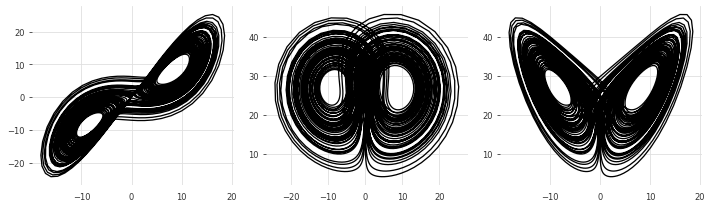

In [143]:
dynm_system = Lorenz()
sol = dynm_system.make_trajectory(5000)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
axes[0].plot(sol[:, 0], sol[:, 1])
axes[1].plot(sol[:, 1], sol[:, 2])
axes[2].plot(sol[:, 0], sol[:, 2])
plt.tight_layout()

## The input to the reservoir is just the x-coordinate of the Lorenz dynamics, here you can set hyperparameters

In [171]:
data = sol[:, 0] # just take the x coordinate of the Lorenz dynamics

'''
data_scaled = data.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(data_scaled)
data_scaled = scaler.transform(data_scaled)
'''

trainLen = 3000
testLen = 1000
initLen = 200

inSize = outSize = 1
reservoir_size = 500
sparsity = 0.1
radius = 1.0
alpha = 0.5                # leaking rate
reg = 1e-7                 # regularization coefficient
Win_scaling = 1            # Harts thesis used the W_in scaling factor of 0.02

#np.random.seed(42)

/home/fbaturst/Desktop/reservoir-computing-dysts


In [172]:
esn = ESN(reservoir_size=reservoir_size, sparsity=sparsity, radius=radius, reg=reg, alpha=alpha, initLen=initLen, seed=1)

Using seed 1


In [173]:
esn.fit(data[0:trainLen])

In [174]:
predictions = esn.predict(testLen)

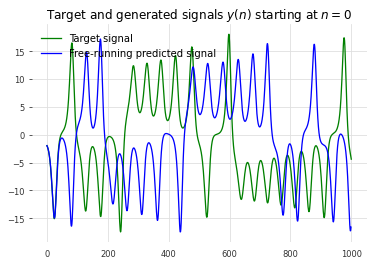

In [175]:
plt.figure(1).clear()
plt.plot( data[trainLen:trainLen+testLen+1], 'g' )
plt.plot( np.squeeze(predictions), 'b' )
plt.title('Target and generated signals $y(n)$ starting at $n=0$')
plt.legend(['Target signal', 'Free-running predicted signal'])

To test whether in the autonomous phase the reservoir dynamics match the dynamics of the underlying attractor, we first apply PCA to reduce the dimensionality of the reservoir states

In [66]:
U, s, Vh = linalg.svd(esn.X_test.T)

In [67]:
principal_comp =  Vh[0:3, :]

In [68]:
X_transformed = principal_comp @ esn.X_test

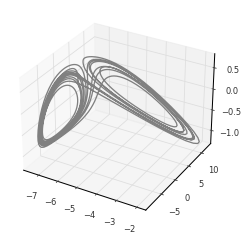

In [69]:
ax = plt.axes(projection='3d')
ax.plot3D(X_transformed[0, :], X_transformed[1, :], X_transformed[2, :], 'gray')

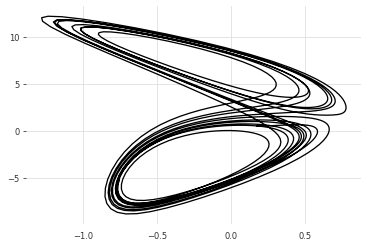

In [70]:
plt.plot(X_transformed[2, :], X_transformed[1, :])

Best attractor reconstructions I was able to get

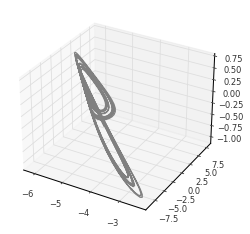

In [428]:
ax = plt.axes(projection='3d')
ax.plot3D(X_transformed1[0, :], X_transformed1[1, :], X_transformed1[2, :], 'gray')